In [62]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.__version__

'1.4.4'

# 1 : 데이터 불러오기

In [64]:
df = pd.read_csv("titanic.csv")

# 2 : 데이터 특성 확인하기

### 데이터 속성 확인하기

In [65]:
df.shape

(891, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.76,0.52,0.38,32.20
std,257.35,0.49,0.84,13.00,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,30.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [68]:
df.head().round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### 결측치 확인하기

In [69]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 이상치 확인하기

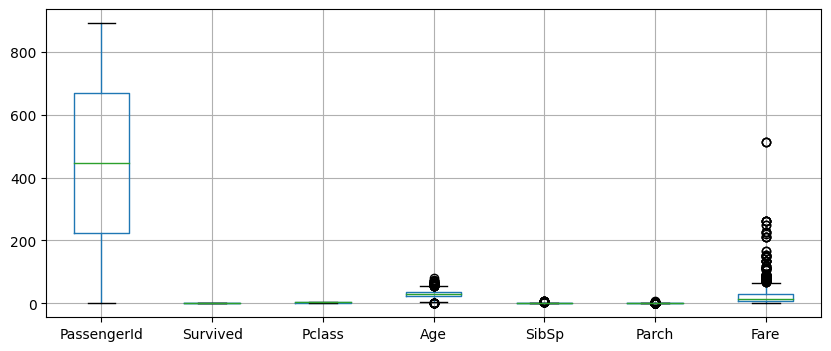

In [70]:
df.boxplot(figsize = (10,4))
plt.show()

Fare의 경우 다른 값보다 월등하게 높은 이상치가 발견된다

# 3. 데이터 전처리

### 결측치는 결측치가 발생한 변수의 평균값으로 대체

In [71]:
df['Cabin'] = df['Cabin'].str.get(i = 0)

- 결측치가 발생한 열 : Cabin, Embarked

In [72]:
# Cabin에서 최빈값은 B이다
df['Cabin'].mode()[0]

'C'

In [73]:
# Embarked에서 최빈값은 S이다
df['Embarked'].mode()[0]

'S'

Cabin과 Embarked의 결측치를 최빈값으로 대체한다

In [74]:
df.fillna({'Cabin': df['Cabin'].mode()[0], 'Embarked':df['Embarked'].mode()[0]}, inplace = True)

In [75]:
# 결측치가 사라진 것 확인 가능
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 파생 변수 생성

In [76]:
# 객실번호의 경우 위에서 최빈값을 구하기 위해 이미 처리함

# 나이에 대한 파생변수 생성
def age_function(x):
    if x  > 56:
        return 'Old'
    elif x > 45:
        return 'Prime'
    elif x > 29:
        return 'Middle'
    elif x > 14:
        return 'Young'
    else:
        return 'Child'
    
df['Age1'] = df['Age'].apply(age_function)

In [77]:
# 가족 수 계산
df['Family'] = df['Parch'] + df['SibSp']

In [78]:
# 요금 구간화
def price_function(x):
    if x  > 5200:
        return 4
    elif x > 150:
        return 3
    elif x > 100:
        return 2
    elif x > 50:
        return 1
    else:
        return 0
   
df['Price'] = df['Fare'].apply(price_function)

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1,Family,Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,Middle,0,0


# 4. 그래프 분석

### 목표변수의 빈도수 현황 확인 : 막대 그래프

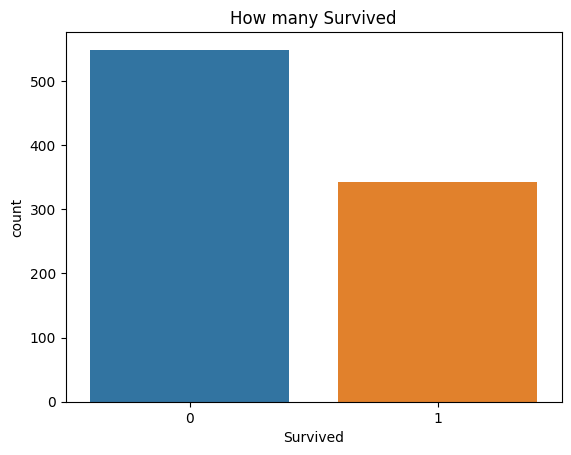

In [80]:
sns.countplot(data = df, x = 'Survived')
plt.title('How many Survived')
plt.show(sns)

### 목표변수의 비율 확인 : 파이차트

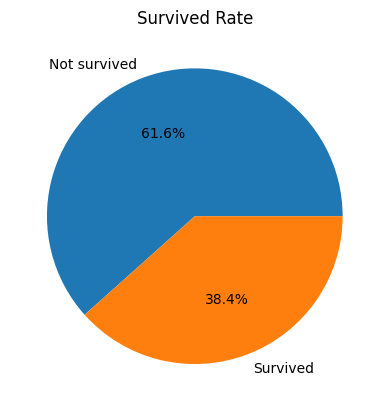

In [81]:
survived_counts = df['Survived'].value_counts()
labels = ['Not survived', 'Survived']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title('Survived Rate')
plt.show()

### 범주형 변수(성별, 승객등급, 탑승지 등)에 대한 비율 확인 : 파이차트

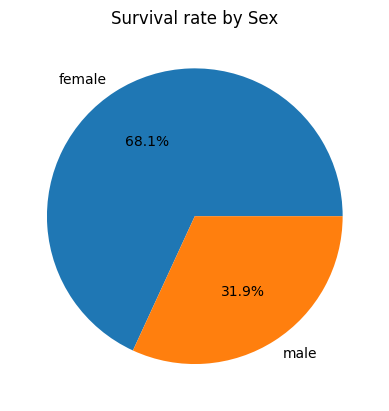

In [134]:
sex_survived_df = df[['Sex', 'Survived']]

# Sex별 생존자 수 구하기
sex_grouped = sex_survived_df.groupby('Sex')
sex_survived_count = sex_grouped.sum()

# 파이차트 그리기
plt.pie(sex_survived_count['Survived'], labels=sex_survived_count.index, autopct='%1.1f%%')
plt.title('Survival rate by Sex')
plt.show()

위 파이차트를 보면 여자가 남성에 비해 살아남은 비율이 크게 보인다

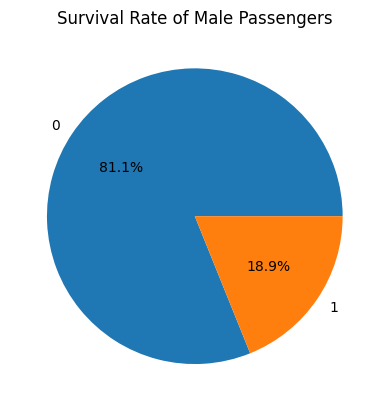

In [126]:
#성별에 대한 비율 확인 

male_survived_counts = df[df['Sex']=='male']['Survived'].value_counts()
plt.pie(male_survived_counts, labels=male_survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Rate of Male Passengers')
plt.show()


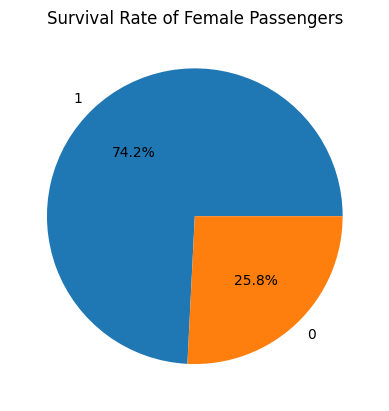

In [83]:
female_survived_counts = df[df['Sex']=='female']['Survived'].value_counts()
plt.pie(female_survived_counts, labels=female_survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Rate of Female Passengers')
plt.show()


하지만 위 두개의 파이차트를 보면 여성과 남성을 분리해서 볼 경우 남성의 생존률이 더 높았음을 알 수 있다.

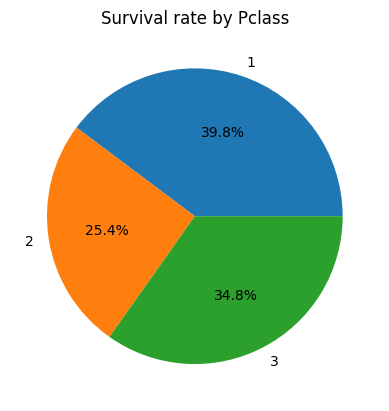

In [141]:
# 승객등급에 대한 비율 확인 

pclass_survived_df = df[['Pclass', 'Survived']]
pclass_grouped = pclass_survived_df.groupby('Pclass')
pclass_survived_count = pclass_grouped.sum()

plt.pie(pclass_survived_count['Survived'], labels=pclass_survived_count.index, autopct='%1.1f%%')
plt.title('Survival rate by Pclass')
plt.show()

# pclass_total_survived= df.groupby('Pclass')['Survived'].value_counts().reset_index(name = 'count')
# pclass_only_survived = pclass_total_survived[pclass_total_survived['Survived'] == 1].drop('Survived', axis = 1)
# pclass_only_survived.set_index(keys = ['Pclass'], inplace = True, drop = True)
# plt.pie(pclass_only_survived['count'], labels=pclass_only_survived.index, autopct='%1.1f%%')
# plt.title('Survival rate by Pclass')
# plt.show()

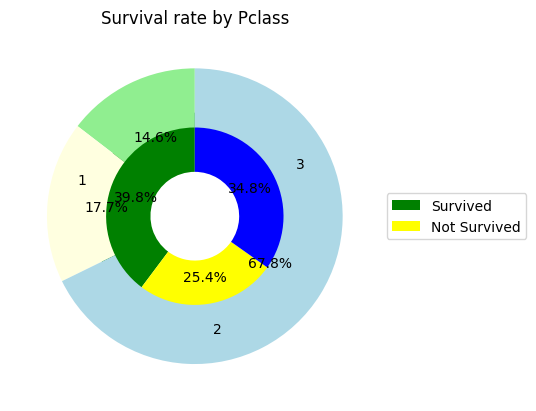

In [149]:
# Pclass별 생존자 수와 사망자 수 구하기
pclass_grouped = df.groupby('Pclass')
pclass_survived_count = pclass_grouped['Survived'].sum()
pclass_not_survived_count = pclass_grouped['Survived'].count() - pclass_survived_count

# 파이차트 그리기
fig, ax = plt.subplots()
ax.pie(pclass_survived_count, labels=pclass_survived_count.index, autopct='%1.1f%%', startangle=90,
       radius=0.7, colors=['green', 'yellow', 'blue'], wedgeprops={'width': 0.4})
ax.pie(pclass_not_survived_count, labels=None, autopct='%1.1f%%', startangle=90,
       radius=1, colors=['lightgreen', 'lightyellow', 'lightblue'], wedgeprops={'width': 0.4})
ax.set(aspect="equal")
plt.title('Survival rate by Pclass')
plt.legend(['Survived', 'Not Survived'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

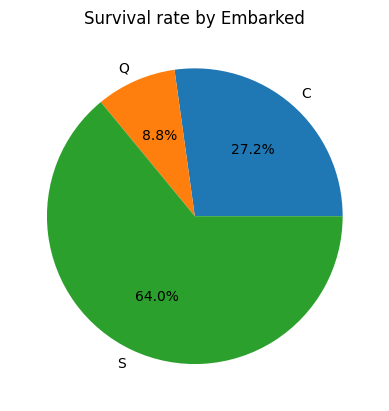

In [132]:
# 탑승에 대한 비율 확인

embarked_survived_df = df[['Embarked', 'Survived']]
embarked_grouped = embarked_survived_df.groupby('Embarked')
embarked_survived_count = embarked_grouped.sum()

plt.pie(embarked_survived_count['Survived'], labels=embarked_survived_count.index, autopct='%1.1f%%')
plt.title('Survival rate by Embarked')
plt.show()

Embarked의 경우 Southampton에서 탑승한 승객들이 가장 생존률이 높았다

### 연속형 변수에 대한 분포 확인 : 히스토그램, boxplot

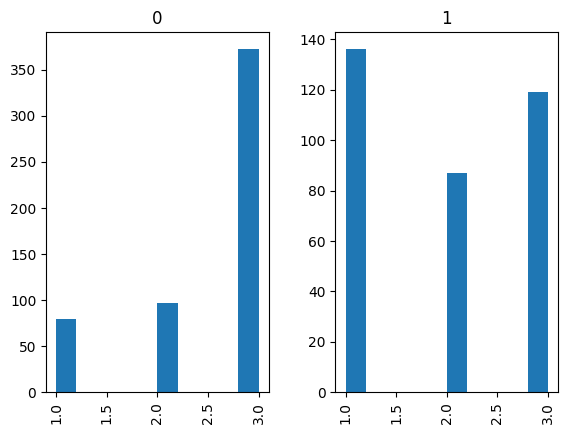

In [158]:
# 히스토그램 그리기
df.hist(column='Pclass', by='Survived', grid=False)
plt.show()

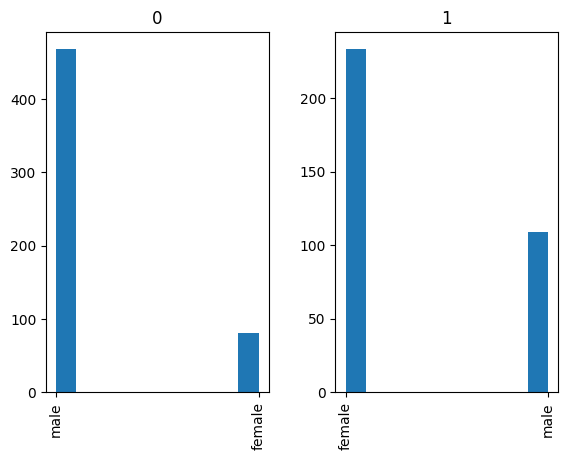

In [154]:
df.hist(column='Sex', by='Survived', grid=False)
plt.show()

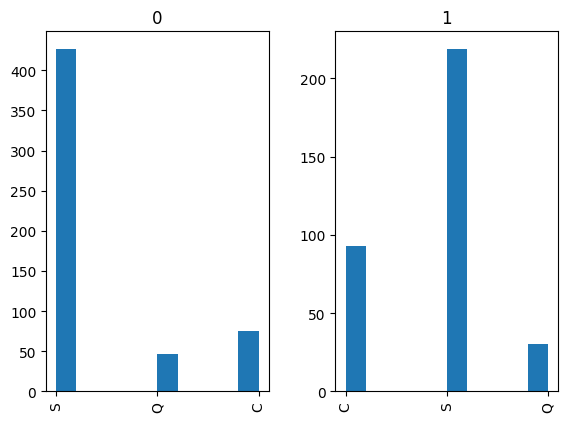

In [155]:
df.hist(column='Embarked', by='Survived', grid=False)
plt.show()

Pclass 변수의 경우, 3등급 클래스에 대한 데이터가 가장 많았고, 1등급 클래스에 대한 데이터가 가장 적었다.

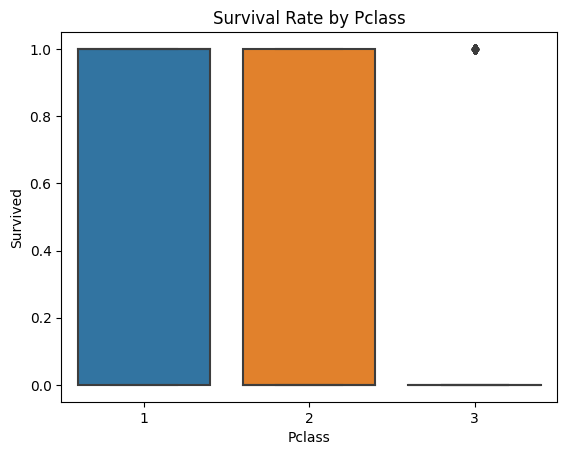

In [157]:
# 박스플롯 그리기
sns.boxplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

Pclass 변수의 경우, 3등급 클래스에 대한 생존자 비율이 가장 낮았다. 

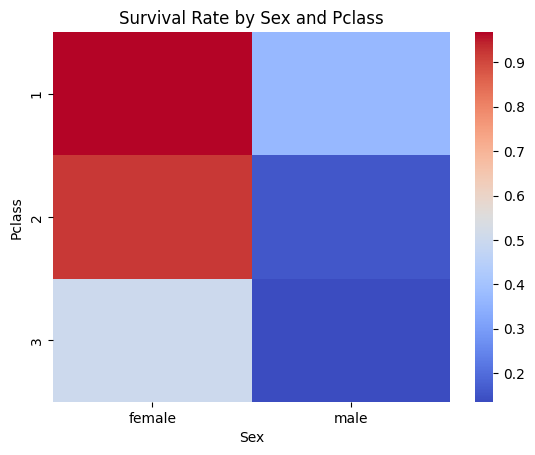

In [159]:
# heatmap 그리기
pivot = pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex')
plt.title('Survival Rate by Sex and Pclass')
sns.heatmap(pivot, cmap='coolwarm')
plt.show()

Pclass와 Sex모두 큰 상관관계가 있는 것을 확인할 수 있다.

1등급일 수록, 남성일수록 유의미하게 생존률이 높아진다.